# TSNE

This notebook computes the TSNE of all datapoints in the feature space for the DCCR project.

## 1. Imports

First, import all dependencies, such as pandas for DataFrames, TSNE from scikit-learn, and plotting utils.

In [2]:
import numpy as np
import pandas as pd

from sklearn.manifold import TSNE
from pathlib import Path

import matplotlib.pylab as plt
%matplotlib inline

## 2. Collect Features

Next, we load up all of the features from the `.csv` files in the "unpacked" data directory.

In [66]:
# Declare the names of all of the contexts that we are using
names = [
    "dot_dusk",
    "dot_morning",
    "emahigh_dusk",
    "emahigh_morning",
    # "emalow_dusk",
    # "emalow_morning",
    "pr_dusk",
    "pr_morning"
]

# Define a quick feature data loading function
def collect_features(names):
    # Point to the top project directory
    projectdir = Path.cwd().joinpath("..", "..", "..").resolve()
    # Point to the top-level directory of the activation features
    datadir = projectdir.joinpath("data", "unpacked", "activations_yolov3_cell=1")
    # Create a dictionary that links a name to a label integer index
    ntoi = {s:i for i,s in enumerate(names)}
    # Initialize an empty list for the labels and empty dataframe for the features
    labels = []
    df = pd.DataFrame()
    # Iterate over every l2 block
    for block in datadir.iterdir():
        # Iterate over ever context within that block
        for context in block.iterdir():
            # Check if we are wanting to use this context
            if context.name in names:
                # Point to the local .csv file containing the features
                local_file = context.joinpath("1", "average_features.csv")
                # Load and transpose the features (most Python functions are row-major, Julia is column-major)
                local_df = pd.read_csv(local_file, header=None).transpose()
                # Get the number of samples and prescribe them all the same integer label
                n_samples = len(local_df)
                labels.extend([ntoi[context.name]]*n_samples)
                # Add the local dataframe to the big one
                df = pd.concat((df, local_df))

    # Return the dataframe of features and list of labels
    return df, labels

# Collect the features into one big dataset with corresponding labels
df, labels = collect_features(names)
print(len(labels), len(df))

In [83]:
tsne = TSNE(n_components=2, random_state=0)
X = tsne.fit_transform(df)
Y = np.array(labels)

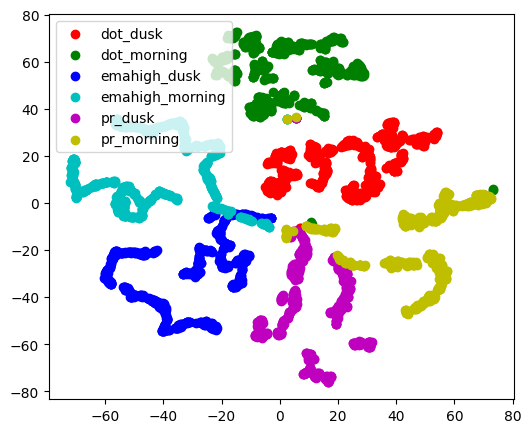

In [103]:
plt.figure(figsize=(6, 5))

target_ids = range(len(names))

colors=('r', 'g', 'b', 'c', 'm', 'y')
for i, c, label in zip(target_ids, colors, names):
    plt.scatter(X[Y==i, 0], X[Y==i, 1], c=c, label=label)
plt.legend()
plt.show()

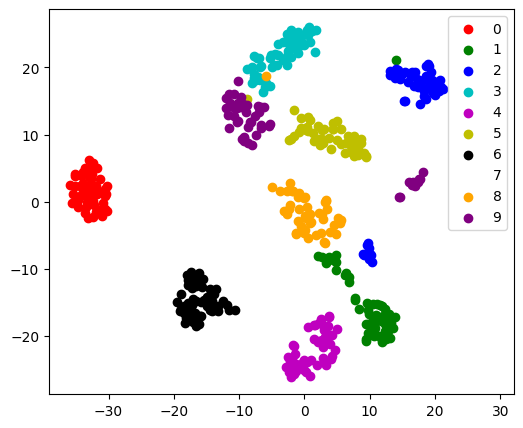

In [78]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_2d = tsne.fit_transform(X)

target_ids = range(len(digits.target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [80]:
y
labels
# np.shape(y)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
